<a href="https://colab.research.google.com/github/imrohitkr/urbandelights/blob/main/Backend/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
def clean_reviews(no_reviews,language, words_to_be_excluded, words_to_be_included, dataset):
    import re
    import nltk
    # nltk.download('stopwords') #Must only be downloaded once
    from nltk.corpus import stopwords #Includes a list of words that souldn't appear in the reivews

    #Create own list of stopwords
    my_stopwords = stopwords.words(language)
    #Append the words from to_be_excluded_words to my_stopwords
    for word in words_to_be_excluded:
        if not any ( word in stpwords for stpwords in my_stopwords):
            my_stopwords.append(word)

    #Remove words from my_stopwords that are present in to_be_included
    for word in words_to_be_included:
        if any (word in stpwords for stpwords in my_stopwords):
            my_stopwords.remove(word)

    #Stemming is the process of extracting the stem of each word e.g. "loved"->"love"
    from nltk.stem.porter import PorterStemmer

    corpus =[] #Will contain the clean reviews"
    for i in range (0, no_reviews):
        review = re.sub('[^a-zA-Z]',' ', dataset['Review'][i]) #Removes all other characters besides the letters and puts the review in a string
        review = review.lower() #Transforms all UPPER-CASE characters to lower-case
        review = review.split() #Separates all the words from the review string and puts them in a list
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set (my_stopwords)] #Remove irrelevant words from rewiews and stems all words
        review = ' '.join(review)
        corpus.append(review) #Append review string to corpus
    return corpus

In [48]:
def bag_of_words(dataset, corpus, maximum_features):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(max_features = maximum_features) #Object for creating the sparse matrix
    X = cv.fit_transform(corpus).toarray() #Sparse matrix
    y = dataset.iloc[:,1].values #Array with the dependent variable for each review (Liked = 1, Disliked = 0)
    return X,y

In [49]:
def score_acc(cm):
    TN= cm[0][0] #True_Negative or results that were predicted to be negative and were negative
    TP = cm[1][1]#True_Positive or results that were predicted to be positive and were positive

    FN = cm[0][1] #False_Negative or results that were predicted to be negative but were positive
    FP = cm [1][0]#False_Positive or results that were predicted to be positive but were negative
    accuracy = (TP + TN)/(TP + TN + FP + FN) #Or correct_predictions/total_predictions
    precision = TP / (TP + FP) #Or correct_positive_predictions/total_correct_predictions
    recall = TP / (TP + FN)#Or correct_positive_predictions/(correct_positive_predictions + false_negative_predictions)
    score = 2 * precision * recall/(precision + recall)
    return accuracy,score


In [50]:
# Applying the Random Forest classification algorithm
def random_forest(number_of_trees, X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, precision_score, recall_score
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Train the Random Forest classifier
    classifier = RandomForestClassifier(n_estimators=number_of_trees, criterion='entropy')
    classifier.fit(X_train, y_train)

    # Predict the test set results
    y_pred = classifier.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute accuracy and score from confusion matrix
    accuracy, score = score_acc(cm)

    # Compute precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print accuracy, score, precision, and recall
    print("Accuracy of the Random Forest algorithm for", number_of_trees, "trees is", accuracy)
    print("Score:", score)
    print("Precision:", precision)
    print("Recall:", recall)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', linewidths=0.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    return classifier, accuracy, score, precision, recall



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy of the Random Forest algorithm for 10000 trees is 0.805
Score: 0.7796610169491525
Precision: 0.8023255813953488
Recall: 0.7582417582417582


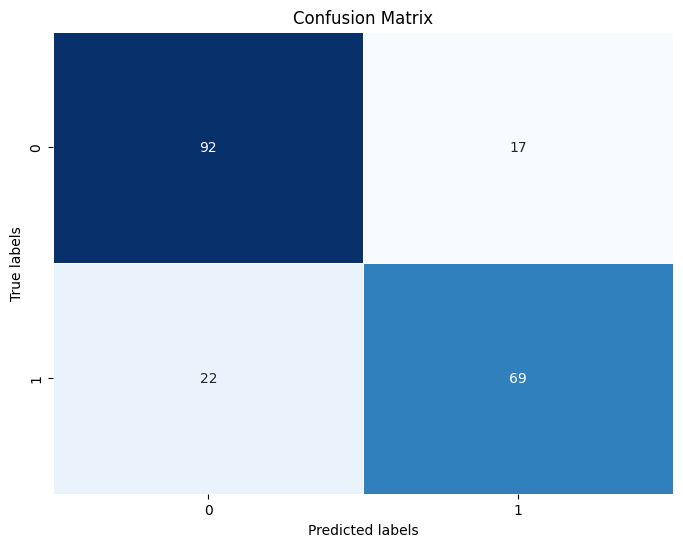

In [51]:
def demo():
    # Please update values of the following variables:
    path = 'Restaurant_Reviews.tsv'
    language = 'english'  # You can find the list of accepted languages in the README.md file
    words_to_be_included = ['not', 'nor', 'no', 'nope', 'nah', 'absurt', 'yuk', 'bad']  # That should be part the reviews
    words_to_be_excluded = ['opinion']  # That shouldn't be part of the reviews
    no_reviews = 1000
    maximum_features = 1500  # Maximum elements that the Bag of Words could contain
    test_set_size = 0.2  # Percentage of the test set

    # Importing the dataset
    import pandas as pd
    dataset = pd.read_csv(path, delimiter='\t', quoting=3)
    # delimiter = '\t' indicates TAB as delimiter, opposed to the classical delimiter ","
    # quoting = 3 ignores the "" present in the reviews

    corpus = clean_reviews(no_reviews, language, words_to_be_excluded, words_to_be_included, dataset)

    X, y = bag_of_words(dataset, corpus, maximum_features)

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size)

    number_of_trees = 10000
    classifier, vectorizer, _, _, _ = random_forest(number_of_trees, X_train, y_train, X_test, y_test)

    # Save the trained model to disk
    joblib.dump(classifier, 'random_forest_model.pkl')

    # Save the vectorizer to disk
    joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


import nltk

nltk.download('stopwords')
demo()
